In [1]:
import numpy as np
import pandas as pd

import seaborn as sns; sns.set()  # for plot styling
import matplotlib.pyplot as plt
pd.options.mode.copy_on_write = True 

# Analisis Exploratorio de datos de Turismo en Argentina

##  Datos

**pernoctes_por_localidad_segun_residencia.csv**: Pernoctaciones en hoteles y parahoteles por localidad de destino según tipo de residencia Cantidad de noches en hoteles y parahoteles por localidad de destino según tipo de residencia en formato de series de tiempo

**coordenadas.csv**: valores de latitud y longitud de localidades Argentinas

**puna_base_agregada.csv**: Base agrupada del Padrón Único Nacional de Alojamiento (PUNA):
Base agrupada del Padrón Único Nacional de Alojamiento con datos de establecimientos, unidades, habitaciones y plazas de alojamientos turísticos.

### 1. pernoctes_por_localidad_segun_residencia.csv
***

In [2]:
turismo=pd.read_csv('../Datos/pernoctes_por_localidad_segun_residencia.csv')

In [3]:
turismo.head(3)

,indice_tiempo,localidad,origen_pernoctes,pernoctes,observaciones
0,2018-01-01,Bahía Blanca,Total,16619.0,NaN
1,2018-01-01,Bahía Blanca,Residentes,15784.0,NaN
2,2018-01-01,Bahía Blanca,No residentes,835.0,NaN


### 2. coordenadas.csv
***

In [4]:
coord_loc=pd.read_csv('../Datos/coordenadas.csv', encoding='latin')

In [5]:
coord_loc.head(3)

,Localidad,Latitud,Longitud
0,Bahía Blanca,-38.7196,-62.2724
1,Bariloche,-41.1335,-71.3100
2,CABA,-34.6118,-58.4173


In [6]:
coord_loc.rename(columns={'Localidad':'localidad'}, inplace=True)

### 3. puna_base_agregada.csv
***

In [7]:
base_alojamientos=pd.read_csv('../Datos/puna_base_agregada.csv', encoding='latin')

In [8]:
base_alojamientos.head(1)

,indice_tiempo,region,ruta_natural,provincia_codigo,provincia_nombre,departamento_partido,localidad,clasificacion_minturdep,tipo,establecimientos,unidades,habitaciones,plazas
0,2020,Buenos Aires,Delta,6,Buenos Aires,Baradero,Baradero,Albergue municipal / complejo deportivo,Otros colectivos,1,0,6,30


In [9]:
base_alojamientos['tipo'].unique()

array(['Otros colectivos', 'Parahoteleros', 'Hoteleros'], dtype=object)

Creo una mascara para quedarme solo con los datos de tipo Parahoteleros y Hoteleros ya que el dataset de pernoctes solo cuenta con estas dos categorias. 

In [10]:
mascara_tipo=base_alojamientos['tipo'].isin(['Parahoteleros', 'Hoteleros'])

In [11]:
base_alojamientos=base_alojamientos[mascara_tipo]

Agrupo los plazas por localidad

In [12]:
base_alojamientos_agrupado=base_alojamientos.groupby(['indice_tiempo','localidad'])['plazas'].sum().reset_index()

In [101]:
base_alojamientos_agrupado[base_alojamientos_agrupado['localidad']=='San Carlos de Bariloche']

,Año,localidad,plazas
878,2020,San Carlos de Bariloche,24207
2030,2021,San Carlos de Bariloche,24039
3181,2022,San Carlos de Bariloche,24653


Diccionario de reemplazo de localidades para normalizarlas con el dataframe de turismo

In [13]:
reemplazo={'Bahía Blanca':'Bahia Blanca', 'Bariloche':'San Carlos de Bariloche', 'CABA':'Ciudad Autonoma de Buenos Aires', 'Calafate':'El Calafate', 'Carlos Paz':'Villa Carlos Paz',
       'Catamarca':'San Fernando del Valle de Catamarca', 'Córdoba':'Cordoba', 'Gualeguaychú':'Gualeguaychu', 'Jujuy':'San Salvador de Jujuy', 'La Angostura':'Villa La Angostura',
       'Malargue-Las Leñas':'Las Leñas', 'Neuquén':'Neuquen', 'Paraná':'Parana', 'Puerto Iguazú':'Puerto Iguazu',
       'Río Cuarto':'Rio Cuarto', 'San Martín de los Andes':'San Martin', 'Termas':'Termas de Rio Hondo', 'Tucumán':'San Miguel de Tucuman',
       'Valle de Uco':'Tunuyan'}

# Uniones de dataset

### Agregar coordenadas al dataset de turismo

In [14]:
union_turismo=pd.merge(turismo, coord_loc, on='localidad')

Convierto columna indice_tiempo a datetime y agrego una columna que sea anio

In [15]:
union_turismo['indice_tiempo']=pd.to_datetime(union_turismo['indice_tiempo'])
union_turismo['Año']=union_turismo['indice_tiempo'].dt.year

Aplico una mascara para obtener los datos de Bariloche Unicamente y elminar la categoria total

In [16]:
union_turismo_bari = union_turismo[(union_turismo['localidad'] == 'Bariloche') & (union_turismo['origen_pernoctes'] != 'Total')]


In [17]:
union_turismo_bari

,indice_tiempo,localidad,origen_pernoctes,pernoctes,observaciones,Latitud,Longitud,Año
4,2018-01-01,Bariloche,Residentes,254665.0,NaN,-41.1335,-71.31,2018
5,2018-01-01,Bariloche,No residentes,69938.0,NaN,-41.1335,-71.31,2018
151,2018-02-01,Bariloche,Residentes,209620.0,NaN,-41.1335,-71.31,2018
152,2018-02-01,Bariloche,No residentes,62128.0,NaN,-41.1335,-71.31,2018
298,2018-03-01,Bariloche,Residentes,131184.0,NaN,-41.1335,-71.31,2018
...,...,...,...,...,...,...,...,...
10148,2023-10-01,Bariloche,No residentes,42589.0,Dato provisorio,-41.1335,-71.31,2023
10294,2023-11-01,Bariloche,Residentes,178831.0,Dato provisorio,-41.1335,-71.31,2023
10295,2023-11-01,Bariloche,No residentes,62489.0,Dato provisorio,-41.1335,-71.31,2023
10441,2023-12-01,Bariloche,Residentes,197496.0,Dato provisorio,-41.1335,-71.31,2023


In [18]:
union_turismo_bari.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 4 to 10442
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   indice_tiempo     144 non-null    datetime64[ns]
 1   localidad         144 non-null    object        
 2   origen_pernoctes  144 non-null    object        
 3   pernoctes         133 non-null    float64       
 4   observaciones     35 non-null     object        
 5   Latitud           144 non-null    float64       
 6   Longitud          144 non-null    float64       
 7   Año               144 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(3)
memory usage: 9.6+ KB


### Union con dataset de plazas

Utilizo el diccionario reemplazo para Normalizar las locaclidades entre los datasets de turismo y plazas.

In [19]:
union_turismo.localidad=union_turismo.localidad.replace(reemplazo)

In [20]:
base_alojamientos_agrupado.head(2)

,indice_tiempo,localidad,plazas
0,2020,25 de Mayo,419
1,2020,28 de Noviembre,81


In [84]:
base_alojamientos_agrupado.columns

Index(['Año', 'localidad', 'plazas'], dtype='object')

In [22]:
base_alojamientos_agrupado.rename(columns={'indice_tiempo':'Año'}, inplace=True)

In [90]:
union_turismo['localidad']=union_turismo['localidad'].astype(str)

In [95]:
base_alojamientos_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3455 entries, 0 to 3454
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Año        3455 non-null   int64 
 1   localidad  3455 non-null   object
 2   plazas     3455 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 81.1+ KB


In [94]:
union_turismo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10584 entries, 0 to 10583
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   indice_tiempo     10584 non-null  datetime64[ns]
 1   localidad         10584 non-null  object        
 2   origen_pernoctes  10584 non-null  object        
 3   pernoctes         8825 non-null   float64       
 4   observaciones     3366 non-null   object        
 5   Latitud           10584 non-null  float64       
 6   Longitud          10584 non-null  float64       
 7   Año               10584 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(3)
memory usage: 620.3+ KB


In [96]:
turismo_con_plazas=pd.merge(union_turismo,base_alojamientos_agrupado, on=['localidad','Año'], how='left')

In [97]:
turismo_con_plazas[turismo_con_plazas['localidad']=='San Carlos de Bariloche']

,indice_tiempo,localidad,origen_pernoctes,pernoctes,observaciones,Latitud,Longitud,Año,plazas
3,2018-01-01,San Carlos de Bariloche,Total,324603.0,NaN,-41.1335,-71.31,2018,NaN
4,2018-01-01,San Carlos de Bariloche,Residentes,254665.0,NaN,-41.1335,-71.31,2018,NaN
5,2018-01-01,San Carlos de Bariloche,No residentes,69938.0,NaN,-41.1335,-71.31,2018,NaN
150,2018-02-01,San Carlos de Bariloche,Total,271748.0,NaN,-41.1335,-71.31,2018,NaN
151,2018-02-01,San Carlos de Bariloche,Residentes,209620.0,NaN,-41.1335,-71.31,2018,NaN
...,...,...,...,...,...,...,...,...,...
10294,2023-11-01,San Carlos de Bariloche,Residentes,178831.0,Dato provisorio,-41.1335,-71.31,2023,NaN
10295,2023-11-01,San Carlos de Bariloche,No residentes,62489.0,Dato provisorio,-41.1335,-71.31,2023,NaN
10440,2023-12-01,San Carlos de Bariloche,Total,310615.0,Dato provisorio,-41.1335,-71.31,2023,NaN
10441,2023-12-01,San Carlos de Bariloche,Residentes,197496.0,Dato provisorio,-41.1335,-71.31,2023,NaN


In [93]:
nulos =turismo_con_plazas[turismo_con_plazas['plazas'].isna()]

In [27]:
nulos['localidad'].unique()

array(['Bahia Blanca', 'San Carlos de Bariloche',
       'Ciudad Autonoma de Buenos Aires', 'Cafayate', 'El Calafate',
       'Villa Carlos Paz', 'San Fernando del Valle de Catamarca',
       'Cordoba', 'Corrientes', 'Formosa', 'Gualeguaychu',
       'San Salvador de Jujuy', 'Villa La Angostura', 'La Falda',
       'La Rioja', 'Las Grutas', 'Las Leñas', 'Mar Chiquita',
       'Mar del Plata', 'Mendoza', 'Merlo', 'Mina Clavero', 'Neuquen',
       'Parana', 'Pinamar', 'Posadas', 'Puerto Iguazu', 'Puerto Madryn',
       'Rafaela', 'Resistencia', 'Rio Cuarto', 'Rio Gallegos', 'Rosario',
       'Salta', 'San Juan', 'San Luis', 'San Martin', 'San Rafael',
       'Santa Fe', 'Santa Rosa', 'Santiago del Estero', 'Tandil',
       'Termas de Rio Hondo', 'San Miguel de Tucuman', 'Ushuaia',
       'Tunuyan', 'Viedma', 'Villa General Belgrano', 'Villa Gesell'],
      dtype=object)

In [28]:
turismo_con_plazas

,indice_tiempo,localidad,origen_pernoctes,pernoctes,observaciones,Latitud,Longitud,Año,plazas
0,2018-01-01,Bahia Blanca,Total,16619.0,NaN,-38.7196,-62.2724,2018,NaN
1,2018-01-01,Bahia Blanca,Residentes,15784.0,NaN,-38.7196,-62.2724,2018,NaN
2,2018-01-01,Bahia Blanca,No residentes,835.0,NaN,-38.7196,-62.2724,2018,NaN
3,2018-01-01,San Carlos de Bariloche,Total,324603.0,NaN,-41.1335,-71.3100,2018,NaN
4,2018-01-01,San Carlos de Bariloche,Residentes,254665.0,NaN,-41.1335,-71.3100,2018,NaN
...,...,...,...,...,...,...,...,...,...
10579,2023-12-01,Villa General Belgrano,Residentes,37698.0,Dato provisorio,-31.9795,-64.5293,2023,NaN
10580,2023-12-01,Villa General Belgrano,No residentes,495.0,Dato provisorio,-31.9795,-64.5293,2023,NaN
10581,2023-12-01,Villa Gesell,Total,108886.0,Dato provisorio,-37.2634,-56.9730,2023,NaN
10582,2023-12-01,Villa Gesell,Residentes,108860.0,Dato provisorio,-37.2634,-56.9730,2023,NaN


In [29]:
turismo_con_plazas.localidad.unique()

array(['Bahia Blanca', 'San Carlos de Bariloche',
       'Ciudad Autonoma de Buenos Aires', 'Cafayate', 'El Calafate',
       'Villa Carlos Paz', 'San Fernando del Valle de Catamarca',
       'Cordoba', 'Corrientes', 'Formosa', 'Gualeguaychu',
       'San Salvador de Jujuy', 'Villa La Angostura', 'La Falda',
       'La Rioja', 'Las Grutas', 'Las Leñas', 'Mar Chiquita',
       'Mar del Plata', 'Mendoza', 'Merlo', 'Mina Clavero', 'Neuquen',
       'Parana', 'Pinamar', 'Posadas', 'Puerto Iguazu', 'Puerto Madryn',
       'Rafaela', 'Resistencia', 'Rio Cuarto', 'Rio Gallegos', 'Rosario',
       'Salta', 'San Juan', 'San Luis', 'San Martin', 'San Rafael',
       'Santa Fe', 'Santa Rosa', 'Santiago del Estero', 'Tandil',
       'Termas de Rio Hondo', 'San Miguel de Tucuman', 'Ushuaia',
       'Tunuyan', 'Viedma', 'Villa General Belgrano', 'Villa Gesell'],
      dtype=object)

In [30]:
union_turismo.to_csv('turismo_con_plazas')

### Datos de Google trends de la busqueda de la palabra Alojamiento Bariloche

In [31]:
trends_Bariloche=pd.read_csv('../Datos/Tenrs_alojamiento_bariloche.csv', sep=',',skiprows=2  )

In [32]:
trends_Bariloche

,Semana,Alojamiento Bariloche: (Todo el mundo)
0,2019-03-03,30
1,2019-03-10,13
2,2019-03-17,25
3,2019-03-24,17
4,2019-03-31,24
...,...,...
256,2024-01-28,49
257,2024-02-04,36
258,2024-02-11,50
259,2024-02-18,31


In [33]:
trends_Bariloche['Semana'] = pd.to_datetime(trends_Bariloche['Semana'])


In [34]:
trends_Bariloche['Mes']=trends_Bariloche['Semana'].dt.month

In [35]:
trends_Bariloche['Año']=trends_Bariloche['Semana'].dt.year

In [36]:
trends_Bariloche

,Semana,Alojamiento Bariloche: (Todo el mundo),Mes,Año
0,2019-03-03,30,3,2019
1,2019-03-10,13,3,2019
2,2019-03-17,25,3,2019
3,2019-03-24,17,3,2019
4,2019-03-31,24,3,2019
...,...,...,...,...
256,2024-01-28,49,1,2024
257,2024-02-04,36,2,2024
258,2024-02-11,50,2,2024
259,2024-02-18,31,2,2024


In [37]:
trends_Bariloche.columns

Index(['Semana', 'Alojamiento Bariloche: (Todo el mundo)', 'Mes', 'Año'], dtype='object')

In [38]:
trends_Bariloche.rename(columns={'Alojamiento Bariloche: (Todo el mundo)':'valor'}, inplace=True)

In [39]:
bariloche_agrupado=trends_Bariloche.groupby(['Año','Mes'])['valor'].mean().reset_index()

In [40]:
bariloche_agrupado.head(3)

,Año,Mes,valor
0,2019,3,21.80
1,2019,4,23.00
2,2019,5,22.75


### Union de trends con dataset de pernoctes y plazas

In [41]:
#turismo_con_plazas['indice_tiempo']=pd.to_datetime(turismo_con_plazas['indice_tiempo'])

In [42]:
turismo_con_plazas['Mes']=turismo_con_plazas['indice_tiempo'].dt.month

In [43]:
#turismo_con_plazas['Año']=turismo_con_plazas['indice_tiempo'].dt.year

In [44]:
turismo_con_plazas

,indice_tiempo,localidad,origen_pernoctes,pernoctes,observaciones,Latitud,Longitud,Año,plazas,Mes
0,2018-01-01,Bahia Blanca,Total,16619.0,NaN,-38.7196,-62.2724,2018,NaN,1
1,2018-01-01,Bahia Blanca,Residentes,15784.0,NaN,-38.7196,-62.2724,2018,NaN,1
2,2018-01-01,Bahia Blanca,No residentes,835.0,NaN,-38.7196,-62.2724,2018,NaN,1
3,2018-01-01,San Carlos de Bariloche,Total,324603.0,NaN,-41.1335,-71.3100,2018,NaN,1
4,2018-01-01,San Carlos de Bariloche,Residentes,254665.0,NaN,-41.1335,-71.3100,2018,NaN,1
...,...,...,...,...,...,...,...,...,...,...
10579,2023-12-01,Villa General Belgrano,Residentes,37698.0,Dato provisorio,-31.9795,-64.5293,2023,NaN,12
10580,2023-12-01,Villa General Belgrano,No residentes,495.0,Dato provisorio,-31.9795,-64.5293,2023,NaN,12
10581,2023-12-01,Villa Gesell,Total,108886.0,Dato provisorio,-37.2634,-56.9730,2023,NaN,12
10582,2023-12-01,Villa Gesell,Residentes,108860.0,Dato provisorio,-37.2634,-56.9730,2023,NaN,12


Me quedo solo con los datos de pernoctes y plazas de bariloche para unirlo con los trends de google. 

In [45]:
turismo_con_plazas_bari=turismo_con_plazas[turismo_con_plazas['localidad']=='San Carlos de Bariloche']

In [46]:
turismo_con_plazas_bari

,indice_tiempo,localidad,origen_pernoctes,pernoctes,observaciones,Latitud,Longitud,Año,plazas,Mes
3,2018-01-01,San Carlos de Bariloche,Total,324603.0,NaN,-41.1335,-71.31,2018,NaN,1
4,2018-01-01,San Carlos de Bariloche,Residentes,254665.0,NaN,-41.1335,-71.31,2018,NaN,1
5,2018-01-01,San Carlos de Bariloche,No residentes,69938.0,NaN,-41.1335,-71.31,2018,NaN,1
150,2018-02-01,San Carlos de Bariloche,Total,271748.0,NaN,-41.1335,-71.31,2018,NaN,2
151,2018-02-01,San Carlos de Bariloche,Residentes,209620.0,NaN,-41.1335,-71.31,2018,NaN,2
...,...,...,...,...,...,...,...,...,...,...
10294,2023-11-01,San Carlos de Bariloche,Residentes,178831.0,Dato provisorio,-41.1335,-71.31,2023,NaN,11
10295,2023-11-01,San Carlos de Bariloche,No residentes,62489.0,Dato provisorio,-41.1335,-71.31,2023,NaN,11
10440,2023-12-01,San Carlos de Bariloche,Total,310615.0,Dato provisorio,-41.1335,-71.31,2023,NaN,12
10441,2023-12-01,San Carlos de Bariloche,Residentes,197496.0,Dato provisorio,-41.1335,-71.31,2023,NaN,12


Unir datos de pernoctes con trends de google

In [47]:
union_con_trens=pd.merge(turismo_con_plazas_bari,bariloche_agrupado, on=['Mes','Año'])

In [48]:
union_con_trens

,indice_tiempo,localidad,origen_pernoctes,pernoctes,observaciones,Latitud,Longitud,Año,plazas,Mes,valor
0,2019-03-01,San Carlos de Bariloche,Total,166884.0,NaN,-41.1335,-71.31,2019,NaN,3,21.80
1,2019-03-01,San Carlos de Bariloche,Residentes,129742.0,NaN,-41.1335,-71.31,2019,NaN,3,21.80
2,2019-03-01,San Carlos de Bariloche,No residentes,37142.0,NaN,-41.1335,-71.31,2019,NaN,3,21.80
3,2019-04-01,San Carlos de Bariloche,Total,127177.0,NaN,-41.1335,-71.31,2019,NaN,4,23.00
4,2019-04-01,San Carlos de Bariloche,Residentes,96907.0,NaN,-41.1335,-71.31,2019,NaN,4,23.00
...,...,...,...,...,...,...,...,...,...,...,...
169,2023-11-01,San Carlos de Bariloche,Residentes,178831.0,Dato provisorio,-41.1335,-71.31,2023,NaN,11,36.75
170,2023-11-01,San Carlos de Bariloche,No residentes,62489.0,Dato provisorio,-41.1335,-71.31,2023,NaN,11,36.75
171,2023-12-01,San Carlos de Bariloche,Total,310615.0,Dato provisorio,-41.1335,-71.31,2023,NaN,12,41.00
172,2023-12-01,San Carlos de Bariloche,Residentes,197496.0,Dato provisorio,-41.1335,-71.31,2023,NaN,12,41.00


In [49]:
mascara=(union_con_trens['localidad']=='San Carlos de Bariloche')&(union_con_trens['origen_pernoctes']=='Total')

In [50]:
union_con_trens_bariloche=union_con_trens[mascara]

In [51]:
union_con_trens_bariloche.head(2)

,indice_tiempo,localidad,origen_pernoctes,pernoctes,observaciones,Latitud,Longitud,Año,plazas,Mes,valor
0,2019-03-01,San Carlos de Bariloche,Total,166884.0,NaN,-41.1335,-71.31,2019,NaN,3,21.8
3,2019-04-01,San Carlos de Bariloche,Total,127177.0,NaN,-41.1335,-71.31,2019,NaN,4,23.0


## Agrego una columna que tenga el valor de busquedas del mes anterior y otro que sea el promedio de los ultimos 4 valores

In [52]:
union_con_trens_bariloche['valor_mes_anterior'] = union_con_trens_bariloche['valor'].shift(1)

In [53]:
# Agregar la columna 'promedio_ultimos_4_valores'
union_con_trens_bariloche['promedio_ultimos_4_valores'] = union_con_trens_bariloche['valor'].rolling(window=3).mean()

In [54]:
union_con_trens_bariloche.head(5)

,indice_tiempo,localidad,origen_pernoctes,pernoctes,observaciones,Latitud,Longitud,Año,plazas,Mes,valor,valor_mes_anterior,promedio_ultimos_4_valores
0,2019-03-01,San Carlos de Bariloche,Total,166884.0,NaN,-41.1335,-71.31,2019,NaN,3,21.80,NaN,NaN
3,2019-04-01,San Carlos de Bariloche,Total,127177.0,NaN,-41.1335,-71.31,2019,NaN,4,23.00,21.80,NaN
6,2019-05-01,San Carlos de Bariloche,Total,92354.0,NaN,-41.1335,-71.31,2019,NaN,5,22.75,23.00,22.516667
9,2019-06-01,San Carlos de Bariloche,Total,143065.0,NaN,-41.1335,-71.31,2019,NaN,6,30.00,22.75,25.250000
12,2019-07-01,San Carlos de Bariloche,Total,372696.0,NaN,-41.1335,-71.31,2019,NaN,7,38.50,30.00,30.416667


## Grafico los valores de pernoctes en Bariloche y los valores de google trends

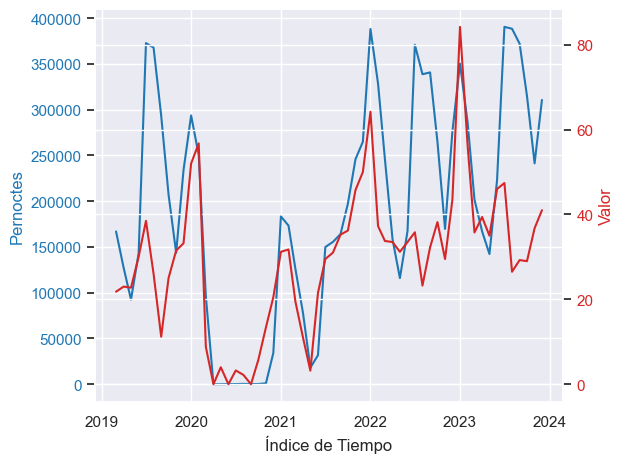

In [55]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener solo las columnas relevantes
df_filtrado = union_con_trens_bariloche[['indice_tiempo', 'pernoctes', 'valor','valor_mes_anterior','promedio_ultimos_4_valores','Mes','Año']]

# Configurar el gráfico
fig, ax1 = plt.subplots()

# Graficar la primera variable en el eje y izquierdo
color = 'tab:blue'
ax1.set_xlabel('Índice de Tiempo')
ax1.set_ylabel('Pernoctes', color=color)
ax1.plot(df_filtrado['indice_tiempo'], df_filtrado['pernoctes'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Crear un segundo eje y para la segunda variable
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Valor', color=color)
ax2.plot(df_filtrado['indice_tiempo'], df_filtrado['valor'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Ajustar el diseño para evitar solapamiento
fig.tight_layout()

# Mostrar el gráfico
plt.show()


<Axes: xlabel='promedio_ultimos_4_valores', ylabel='pernoctes'>

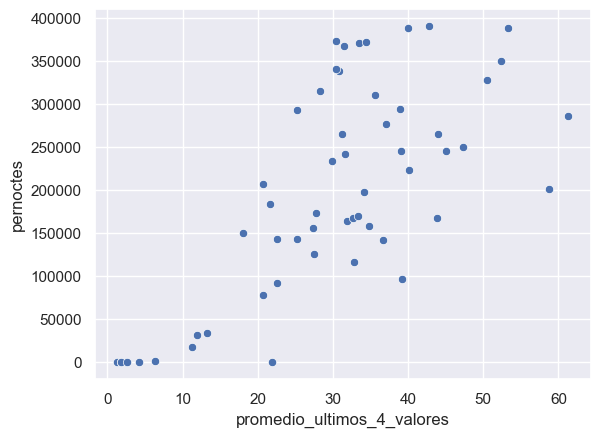

In [56]:
sns.scatterplot(data=union_con_trens_bariloche, y='pernoctes', x='promedio_ultimos_4_valores')

<Axes: xlabel='valor', ylabel='pernoctes'>

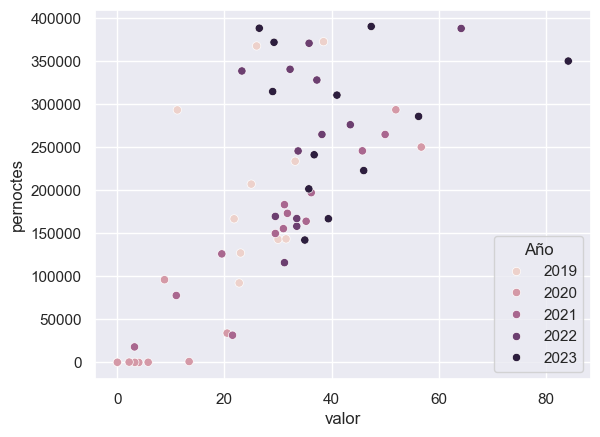

In [57]:
sns.scatterplot(data=union_con_trens_bariloche, y='pernoctes', x='valor',hue='Año')

<Axes: xlabel='valor_mes_anterior', ylabel='pernoctes'>

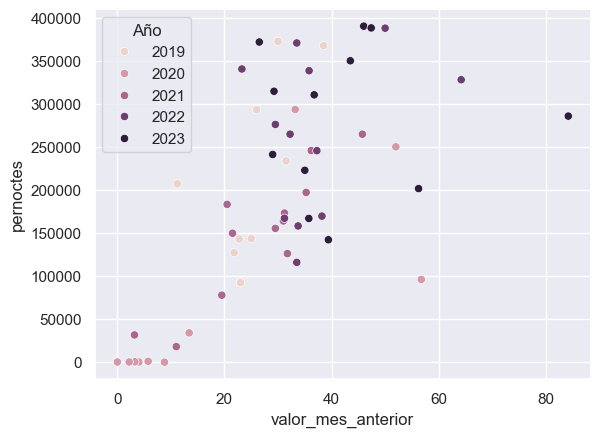

In [58]:
sns.scatterplot(data=union_con_trens_bariloche, y='pernoctes', x='valor_mes_anterior',hue='Año')

In [59]:
df_filtrado.to_csv('para_serie_tiempo')

In [60]:
df_filtrado.head(3)

,indice_tiempo,pernoctes,valor,valor_mes_anterior,promedio_ultimos_4_valores,Mes,Año
0,2019-03-01,166884.0,21.80,NaN,NaN,3,2019
3,2019-04-01,127177.0,23.00,21.8,NaN,4,2019
6,2019-05-01,92354.0,22.75,23.0,22.516667,5,2019


In [61]:
df_filtrado['valor_mes_año_anterior'] = df_filtrado['valor'].shift(12)  # 12 meses en un año

In [62]:
df=df_filtrado.copy()

In [63]:
df2=df_filtrado.copy()

In [64]:
df2.columns

Index(['indice_tiempo', 'pernoctes', 'valor', 'valor_mes_anterior',
       'promedio_ultimos_4_valores', 'Mes', 'Año', 'valor_mes_año_anterior'],
      dtype='object')

In [65]:
df2['Mes'] = df2['Mes'].astype(str)
df2['Año'] = df2['Año'].astype(str)

In [66]:
df2 = pd.get_dummies(df2, columns=['Mes', 'Año'], prefix=['Mes', 'Año'], drop_first=True)

In [67]:
df2.head()

,indice_tiempo,pernoctes,valor,valor_mes_anterior,promedio_ultimos_4_valores,valor_mes_año_anterior,Mes_10,Mes_11,Mes_12,Mes_2,...,Mes_4,Mes_5,Mes_6,Mes_7,Mes_8,Mes_9,Año_2020,Año_2021,Año_2022,Año_2023
0,2019-03-01,166884.0,21.80,NaN,NaN,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2019-04-01,127177.0,23.00,21.80,NaN,NaN,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
6,2019-05-01,92354.0,22.75,23.00,22.516667,NaN,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9,2019-06-01,143065.0,30.00,22.75,25.250000,NaN,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
12,2019-07-01,372696.0,38.50,30.00,30.416667,NaN,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [68]:
df.columns

Index(['indice_tiempo', 'pernoctes', 'valor', 'valor_mes_anterior',
       'promedio_ultimos_4_valores', 'Mes', 'Año', 'valor_mes_año_anterior'],
      dtype='object')

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



# Ordenar por 'indice_tiempo'
df = df.sort_values(by='indice_tiempo')

# Imputar valores nulos
df = df.fillna(0)  # Puedes usar diferentes estrategias para imputar valores nulos según tus necesidades

# Definir las features (X) y la target (y)
features = ['valor']
target = 'pernoctes'

X = df[features]
y = df[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'r2: {r2}')
# Imprimir los coeficientes del modelo
print('Coeficientes del modelo:')
for feature, coef in zip(features, model.coef_):
    print(f'{feature}: {coef}')

# Imprimir el intercepto del modelo
print(f'Intercepto del modelo: {model.intercept_}')


Mean Squared Error: 13085144565.627602
r2: -0.9134041526086172
Coeficientes del modelo:
valor: 5872.323995352962
Intercepto del modelo: 14408.485396286735


In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Ordenar por 'indice_tiempo'
df = df.sort_values(by='indice_tiempo')

# Imputar valores nulos
df = df.fillna(0)  # Puedes usar diferentes estrategias para imputar valores nulos según tus necesidades

# Definir las features (X) y la target (y)
features = ['valor_mes_anterior', 'Mes','Año']
target = 'pernoctes'

X = df[features]
y = df[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Inicializar el modelo de árbol de decisión
model = DecisionTreeRegressor()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'r2: {r2}')

# No hay coeficientes ni intercepto en un árbol de decisión

# Visualizar el árbol (opcional)
# from sklearn.tree import export_text
# tree_rules = export_text(model, feature_names=features)
# print(tree_rules)


Mean Squared Error: 4690388355.25
r2: 0.3141376076304737


In [72]:
df2 = df2.fillna(0)
features = ['valor_mes_anterior',
        'Mes_10', 'Mes_11', 'Mes_12', 'Mes_2', 'Mes_3', 'Mes_4',
       'Mes_5', 'Mes_6', 'Mes_7', 'Mes_8', 'Mes_9', 'Año_2020',
       'Año_2021', 'Año_2022', 'Año_2023']
target = 'pernoctes'

X = df2[features]
y = df2[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Inicializar el modelo de árbol de decisión
model = DecisionTreeRegressor()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'r2: {r2}')

Mean Squared Error: 10683536548.083334
r2: -0.5622237181349878


         Real  Predicción
138  350187.0    388088.0
141  285907.0    328164.0
144  201686.0     96118.0
147  167006.0    245715.0
150  142228.0    245715.0
153  222950.0    158266.0
156  390398.0    370874.0
159  388352.0    367734.0
162  371970.0    340647.0
165  314773.0    264908.0
168  241320.0    264908.0
171  310615.0    276215.0


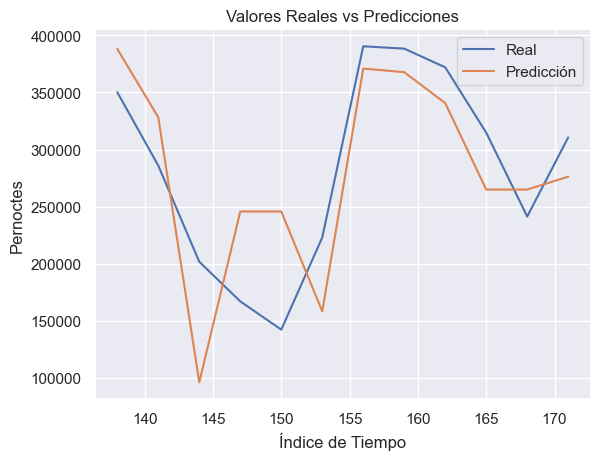

Mean Squared Error: 3455759914.8333335
r2: 0.49467387705980925


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Ordenar por 'indice_tiempo'
df = df.sort_values(by='indice_tiempo')

# Imputar valores nulos
df = df.fillna(0)  # Puedes usar diferentes estrategias para imputar valores nulos según tus necesidades

# Definir las features (X) y la target (y)
features = ['valor_mes_anterior','Mes','Año']
target = 'pernoctes'

X = df[features]
y = df[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Inicializar el modelo de árbol de decisión
model = DecisionTreeRegressor()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostrar los valores reales y las predicciones
results_df = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
print(results_df)

# Graficar los resultados
plt.plot(results_df.index, results_df['Real'], label='Real')
plt.plot(results_df.index, results_df['Predicción'], label='Predicción')
plt.xlabel('Índice de Tiempo')
plt.ylabel('Pernoctes')
plt.title('Valores Reales vs Predicciones')
plt.legend()
plt.show()

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'r2: {r2}')


In [74]:
X_test.head()

,valor_mes_anterior,Mes,Año
138,43.50,1,2023
141,84.20,2,2023
144,56.25,3,2023
147,35.75,4,2023
150,39.40,5,2023


[I 2024-03-08 18:00:15,855] A new study created in memory with name: no-name-b221585c-499c-4dbc-be70-309bbdd27102
/var/folders/n9/fw43flpn4k74bk1f25xmgj340000gn/T/ipykernel_9070/590799692.py:30: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
/var/folders/n9/fw43flpn4k74bk1f25xmgj340000gn/T/ipykernel_9070/590799692.py:31: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
[I 2024-03-08 18:00:15,924] Trial 0 finished with value: 0.5780220164223391 and parameters: {'booster': 'dart', 'lambda': 5.044198021198351e-06, 'alpha': 1.2050391175902632e-06, 'colsample_bytree': 

Mejores hiperparámetros: {'booster': 'gbtree', 'lambda': 0.23797296723633768, 'alpha': 3.38255581292641e-06, 'colsample_bytree': 0.6722929717551459, 'subsample': 0.9170682885800712, 'learning_rate': 0.28255109276327345, 'n_estimators': 206, 'max_depth': 5, 'min_child_weight': 1}
Mejor valor de r2: 0.8275771873237436
         Real     Predicción
138  350187.0  319898.125000
141  285907.0  244343.046875
144  201686.0  194361.812500
147  167006.0  193666.796875
150  142228.0  215705.703125
153  222950.0  206347.828125
156  390398.0  411098.031250
159  388352.0  374797.906250
162  371970.0  293405.031250
165  314773.0  248983.078125
168  241320.0  176092.875000
171  310615.0  251552.078125


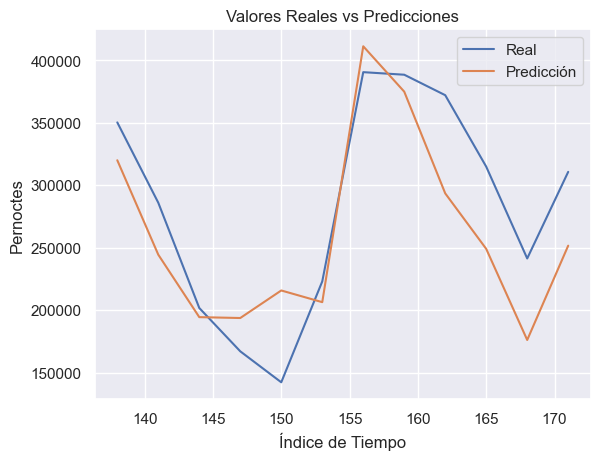

Mean Squared Error: 2328333699.208374
r2: 0.6595342644951352


In [75]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import optuna

# Ordenar por 'indice_tiempo'
df2 = df2.sort_values(by='indice_tiempo')

# Imputar valores nulos
df2 = df2.fillna(0)

# Definir las features (X) y la target (y)
features = ['valor_mes_anterior', 'Mes_10', 'Mes_11', 'Mes_12', 'Mes_2', 'Mes_3', 'Mes_4',
       'Mes_5', 'Mes_6', 'Mes_7', 'Mes_8', 'Mes_9', 'Año_2020',
       'Año_2021', 'Año_2022', 'Año_2023']
target = 'pernoctes'

X = df2[features]
y = df2[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': 42
    }

    model = xgb.XGBRegressor(**params)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    return r2

# Crear un estudio de Optuna y ejecutar la optimización
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Imprimir los resultados de la optimización
print('Mejores hiperparámetros:', study.best_params)
print('Mejor valor de r2:', study.best_value)

# Obtener el modelo con los mejores hiperparámetros
best_params = study.best_params
best_model = xgb.XGBRegressor(**best_params)

# Entrenar el modelo con todos los datos de entrenamiento
best_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Mostrar los valores reales y las predicciones
results_df = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
print(results_df)

# Graficar los resultados
plt.plot(results_df.index, results_df['Real'], label='Real')
plt.plot(results_df.index, results_df['Predicción'], label='Predicción')
plt.xlabel('Índice de Tiempo')
plt.ylabel('Pernoctes')
plt.title('Valores Reales vs Predicciones')
plt.legend()
plt.show()

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'r2: {r2}')


[I 2024-03-08 18:00:36,658] A new study created in memory with name: no-name-44aaccbd-be7d-4add-aaa6-7473768fe345
/var/folders/n9/fw43flpn4k74bk1f25xmgj340000gn/T/ipykernel_9070/1376413196.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
/var/folders/n9/fw43flpn4k74bk1f25xmgj340000gn/T/ipykernel_9070/1376413196.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
[I 2024-03-08 18:00:36,731] Trial 0 finished with value: 0.4133151839538539 and parameters: {'booster': 'gbtree', 'lambda': 6.577370380944863e-06, 'alpha': 9.762710585171803e-08, 'colsample_bytree

Mejores hiperparámetros: {'booster': 'gbtree', 'lambda': 0.6276719338995482, 'alpha': 0.0007987995150517165, 'colsample_bytree': 0.8742088973415157, 'subsample': 0.8180457448786557, 'learning_rate': 0.20890732058725212, 'n_estimators': 80, 'max_depth': 5, 'min_child_weight': 1}
Mejor valor de r2: 0.9261209049293374
         Real     Predicción
138  350187.0  388142.343750
141  285907.0  328193.031250
144  201686.0  224524.562500
147  167006.0  158020.593750
150  142228.0  159717.093750
153  222950.0  184822.062500
156  390398.0  396586.687500
159  388352.0  361059.062500
162  371970.0  319070.875000
165  314773.0  277793.531250
168  241320.0  196306.359375
171  310615.0  268649.625000


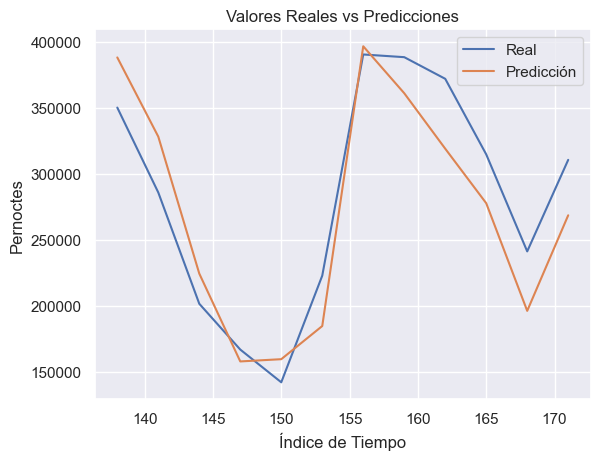

Mean Squared Error: 1193915450.4297893
r2: 0.8254170774148892


In [76]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import optuna

# Ordenar por 'indice_tiempo'
df = df.sort_values(by='indice_tiempo')

# Imputar valores nulos
df = df.dropna()

# Definir las features (X) y la target (y)
features = ['valor_mes_anterior', 'Mes','Año']
target = 'pernoctes'

X = df[features]
y = df[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': 42
    }

    model = xgb.XGBRegressor(**params)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    return r2

# Crear un estudio de Optuna y ejecutar la optimización
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Imprimir los resultados de la optimización
print('Mejores hiperparámetros:', study.best_params)
print('Mejor valor de r2:', study.best_value)

# Obtener el modelo con los mejores hiperparámetros
best_params = study.best_params
best_model = xgb.XGBRegressor(**best_params)

# Entrenar el modelo con todos los datos de entrenamiento
best_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Mostrar los valores reales y las predicciones
results_df = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
print(results_df)

# Graficar los resultados
plt.plot(results_df.index, results_df['Real'], label='Real')
plt.plot(results_df.index, results_df['Predicción'], label='Predicción')
plt.xlabel('Índice de Tiempo')
plt.ylabel('Pernoctes')
plt.title('Valores Reales vs Predicciones')
plt.legend()
plt.show()

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'r2: {r2}')

In [77]:
best_model.save_model('xgb_model_turismo_1.json')

In [105]:
X_test = pd.concat([X_test, results_df['Predicción']], axis=1)

In [107]:
X_test = pd.concat([X_test, results_df['Real']], axis=1)

In [108]:
X_test 

,valor_mes_anterior,Mes,Año,Predicción,Real
138,43.50,1,2023,388142.343750,350187.0
141,84.20,2,2023,328193.031250,285907.0
144,56.25,3,2023,224524.562500,201686.0
147,35.75,4,2023,158020.593750,167006.0
150,39.40,5,2023,159717.093750,142228.0
153,35.00,6,2023,184822.062500,222950.0
156,46.00,7,2023,396586.687500,390398.0
159,47.40,8,2023,361059.062500,388352.0
162,26.50,9,2023,319070.875000,371970.0
165,29.25,10,2023,277793.531250,314773.0
